In [1]:
import warnings
warnings.filterwarnings('ignore')
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
import nltk
from nltk.tokenize import word_tokenize


# Sklearn clustering and encoding 
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from sklearn.metrics import adjusted_rand_score
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.colors as mcolors


In [2]:
!python --version

# Version des bibliothèques utilisées
print('\n'.join(f'{m.__name__} - {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))



Python 3.11.5
pandas - 2.0.3
numpy - 1.26.3
seaborn - 0.12.2
nltk - 3.8.1
gensim - 4.3.0


In [3]:
df=  pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
df.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [5]:
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
212,de29bf3288345e23b0e25345a3a057fb,2015-12-01 12:40:44 +0000,http://www.flipkart.com/orange-tree-maxim-wall...,Orange Tree Maxim Wall Decor Set Of 3 Showpiec...,"[""Home Decor & Festive Needs >> Showpieces >> ...",SHIE5HBGDYSHVA5R,1999.0,1999.0,de29bf3288345e23b0e25345a3a057fb.jpg,False,Orange Tree Maxim Wall Decor Set Of 3 Showpiec...,No rating available,No rating available,Orange Tree,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
640,6d460d2e12ff7c84cb6b9af783d465ae,2016-02-28 10:36:58 +0000,http://www.flipkart.com/nammababy-baby-girl-s-...,NammaBaby Baby Girl's Animal Print Top & Pyjam...,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",NSTECQBQFGMTK9TE,499.0,455.0,6d460d2e12ff7c84cb6b9af783d465ae.jpg,False,Specifications of NammaBaby Baby Girl's Animal...,No rating available,No rating available,NammaBaby,"{""product_specification""=>[{""key""=>""Pattern"", ..."
211,e99d9abb115a9bd580bcccf9ff4d4881,2015-12-01 12:40:44 +0000,http://www.flipkart.com/lal-haveli-wooden-tabl...,Lal Haveli Wooden Table Decor Mother & Baby El...,"[""Home Decor & Festive Needs >> Showpieces >> ...",SHIE9J6PVG9ZE9M5,2750.0,2069.0,e99d9abb115a9bd580bcccf9ff4d4881.jpg,False,Lal Haveli Wooden Table Decor Mother & Baby El...,No rating available,No rating available,Lal Haveli,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
142,af1ac46194b5488048c459102a16a57e,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-abstracts-1...,Rockmantra Abstracts 16 Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Rockmantr...",MUGEAGGKXFJDBZ9Q,499.0,199.0,af1ac46194b5488048c459102a16a57e.jpg,False,Rockmantra Abstracts 16 Ceramic Mug (5.5 l)\r\...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
878,dc777afc918f513a7253187e00a11948,2015-12-20 08:26:17 +0000,http://www.flipkart.com/woven-terry-cotton-bat...,Woven Terry Cotton Bath Towel,"[""Home Furnishing >> Bath Linen >> Towels""]",BTWEBRYFPZQDCGJC,799.0,649.0,dc777afc918f513a7253187e00a11948.jpg,False,"Woven Terry Cotton Bath Towel (Bath Towel, Mul...",No rating available,No rating available,Woven Terry,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [6]:
df.dtypes.value_counts()

object     12
float64     2
bool        1
Name: count, dtype: int64

In [7]:
df.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

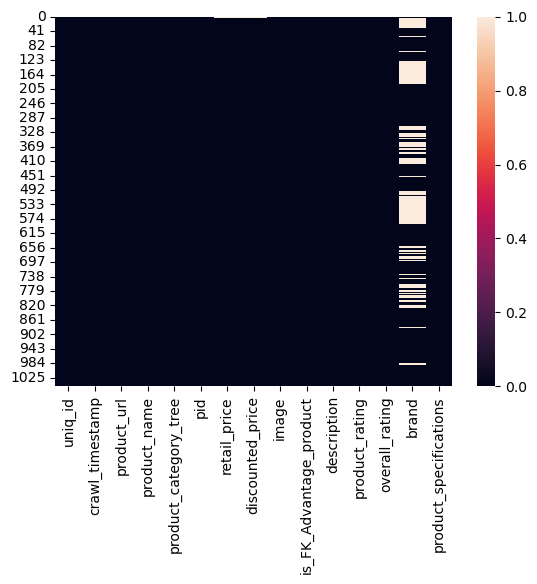

In [8]:
sns.heatmap(df.isnull());

### Traitement de la fonctionnalité "product_category_tree"

In [9]:
df.duplicated(subset="product_category_tree").sum()

408

In [10]:
df_cat = df.groupby('product_category_tree')
df_cat.first()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
product_category_tree,,,,,,,,,,,,,,
"[""Baby Care >> Baby & Kids Gifts >> Decorations >> Doraemon Gift Family Ceramic Coffee Mug Decorations >> Doraemon Gift Family Ceramic Coffee Mug Multicol...""]",6325bf868b9040a0599f257aba42e9e0,2016-03-03 11:29:08 +0000,http://www.flipkart.com/doraemon-gift-family-c...,Doraemon Gift Family Ceramic Coffee Mug Multic...,DECEG7K7Y3URGWXH,399.0,280.0,6325bf868b9040a0599f257aba42e9e0.jpg,False,Specifications of Doraemon Gift Family Ceramic...,No rating available,No rating available,Doraemon Gift Family Ceramic Coffee Mug,"{""product_specification""=>[{""key""=>""Sales Pack..."
"[""Baby Care >> Baby & Kids Gifts >> Photo Frames >> Cocovey Photo Frames""]",fd10586bf7f01bc57e0c5364d4b2c3f7,2015-12-31 09:19:31 +0000,http://www.flipkart.com/cocovey-metal-photo-fr...,Cocovey Metal Photo Frame,PHFEBZ2GBSK3U43Z,749.0,549.0,fd10586bf7f01bc57e0c5364d4b2c3f7.jpg,False,"Cocovey Metal Photo Frame (Photo Size - 6*4, 1...",No rating available,No rating available,None,"{""product_specification""=>[{""key""=>""Stand Mate..."
"[""Baby Care >> Baby & Kids Gifts >> Photo Frames >> Indha Craft Photo Frames""]",6eabdbbbffdfae86c3c5177ba0f96ea7,2015-12-31 09:19:31 +0000,http://www.flipkart.com/indha-craft-cloth-phot...,Indha Craft Cloth Photo Frame,PHFDWUHW25WAWXHY,300.0,132.0,6eabdbbbffdfae86c3c5177ba0f96ea7.jpg,False,Indha Craft Cloth Photo Frame (Photo Size - 12...,No rating available,No rating available,None,"{""product_specification""=>[{""key""=>""Stand Mate..."
"[""Baby Care >> Baby & Kids Gifts >> Photo Frames >> MH Photo Frames""]",d06bb04b096c77dc3302eaf2db336f96,2015-12-31 09:19:31 +0000,http://www.flipkart.com/mh-mdf-photo-frame/p/i...,MH MDF Photo Frame,PHFEE9ZQGBXX5NYY,999.0,899.0,d06bb04b096c77dc3302eaf2db336f96.jpg,False,Buy MH MDF Photo Frame for Rs.899 online. MH M...,No rating available,No rating available,None,"{""product_specification""=>[{""key""=>""Stand Mate..."
"[""Baby Care >> Baby & Kids Gifts >> Photo Frames >> Wood Beauty Photo Frames""]",f79c9db3abd7faca714c92aeba9b6728,2015-12-31 09:19:31 +0000,http://www.flipkart.com/wood-beauty-photo-fram...,Wood Beauty Wood Photo Frame,PHFEEDJREU4HHEJG,650.0,450.0,f79c9db3abd7faca714c92aeba9b6728.jpg,False,Buy Wood Beauty Wood Photo Frame for Rs.450 on...,No rating available,No rating available,None,"{""product_specification""=>[{""key""=>""Frame Mate..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"[""Watches >> Wrist Watches >> Yves Bertelin Wrist Watches >> Yves Bertelin YBSCR557 Analog Watch - For Women""]",4d2e9f36823bad0f6fe8c6b19bb92bdb,2016-04-24 18:34:50 +0000,http://www.flipkart.com/yves-bertelin-ybscr557...,Yves Bertelin YBSCR557 Analog Watch - For Women,WATEHYHJZDVZXNHZ,6950.0,3475.0,4d2e9f36823bad0f6fe8c6b19bb92bdb.jpg,False,Specifications of Yves Bertelin YBSCR557 Analo...,No rating available,No rating available,Yves Bertelin,"{""product_specification""=>[{""key""=>""Mechanism""..."
"[""Watches >> Wrist Watches >> fastrack Wrist Watches""]",653826cd53f1d9e2c086c0ac7846ef70,2015-12-04 07:25:36 +0000,http://www.flipkart.com/fastrack-38015pl01-ana...,"fastrack 38015PL01 Analog Watch - For Men, Boys",WATE9WKSHRYTM2PP,2495.0,2495.0,653826cd53f1d9e2c086c0ac7846ef70.jpg,False,"fastrack 38015PL01 Analog Watch - For Men, Bo...",No rating available,No rating available,None,"{""product_specification""=>[{""key""=>""Chronograp..."
"[""Watches >> Wrist Watches >> palito Wrist Watches >> palito PLO 149 Analog Watch - For Girls, Women""]",64a9d0488652194fd8e879d5e6dc8015,2016-04-24 18:34:50 +0000,http://www.flipkart.com/palito-plo-149-analog-...,"palito PLO 149 Analog Watch - For Girls, Women",WATEHZP3ZA9YT99G,1500.0,199.0,64a9d0488652194fd8e879d5e6dc8015.jpg,False,Specifications of palito PLO 149 Analog Watch ...,No rating available,No rating available

In [11]:
#Diviser le contenu de la colonne sur '>>' et récupérer le premier élément = la catégorie principale du produit
df['category'] = df['product_category_tree'].str.split('>>').str.get(0).str.strip()

# Suppression de la ponctuation indésirable de la colonne de catégorie
df['category'] = df['category'].str.extract(r'^\["([^"]+)')

In [12]:
# Real number of product categories 
category_count = df['category'].value_counts()

In [13]:
category_count 

category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

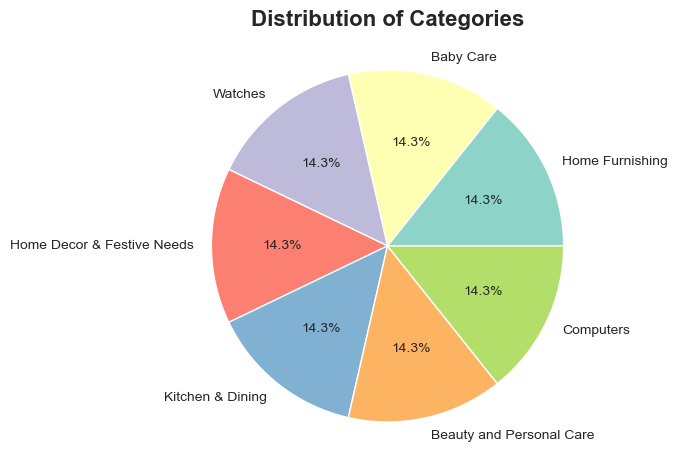

In [14]:
# La distribution par categorie
custom_colors = sns.color_palette('Set3', len(category_count))
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Distribution of Categories',  fontsize=16, fontweight='bold', pad=20)
plt.axis('equal') 

plt.show()

Il y a sept grandes catégories de produits

## Pre traitement

## Exploration des données


In [15]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wall

In [16]:
df_t = df 
df_t.shape

(1050, 16)

In [17]:
df.description.apply(lambda i : len(i))

0       1420
1        444
2       1258
3        858
4       1197
        ... 
1045    2432
1046    1660
1047     262
1048     210
1049     187
Name: description, Length: 1050, dtype: int64

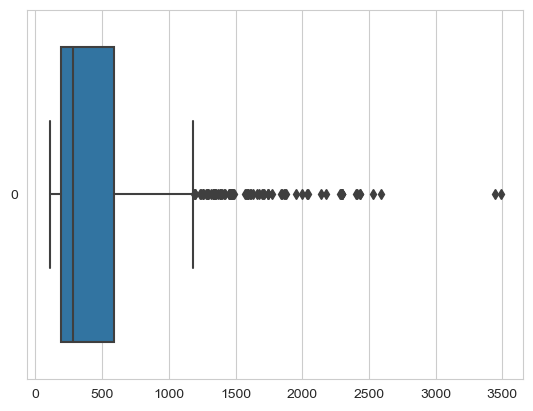

In [18]:
tmp = df.description.str.len()
sns.boxplot(tmp, orient='h');

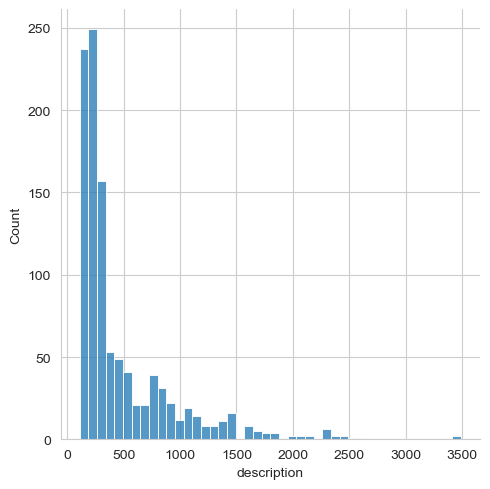

In [19]:
sns.displot(tmp);

In [20]:
df_long = df["_lon_desc"] = tmp
df_long.head(10)

0    1420
1     444
2    1258
3     858
4    1197
5     275
6     268
7     817
8     410
9     430
Name: description, dtype: int64

### Exploration du corpus et des documents

In [21]:
df.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category,_lon_desc
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,1420
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,444
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,1258
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,858
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,1197
5,893aa5ed55f7cff2eccea7758d7a86bd,2015-12-04 07:25:36 +0000,http://www.flipkart.com/maserati-time-r8851116...,Maserati Time R8851116001 Analog Watch - For ...,"[""Watches >> Wrist Watches >> Maserati Time Wr...",WATEAYAHJ8CUCAYM,24400.0,24400.0,893aa5ed55f7cff2eccea7758d7a86bd.jpg,False,Maserati Time R8851116001 Analog Watch - For ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",Watches,275
6,f355cc1ccb08bd0d283ed979b7ee7515,2015-12-04 07:25:36 +0000,http://www.flipkart.com/camerii-wm64-elegance-...,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...",WATE6Y6D2MZHWGBZ,1099.0,449.0,f355cc1ccb08bd0d283ed979b7ee7515.jpg,False,"Camerii WM64 Elegance Analog Watch - For Men,...",5,5,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",Watches,268
7,dd0e3470a7e6ed76fd69c2da27721041,2015-12-04 07:25:36 +0000,http://www.flipkart.com/t-star-uft-tsw-005-bk-...,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,"[""Watches >> Wrist Watches >> T STAR Wrist Wat...",WATECFFVGFZPAD3D,999.0,399.0,dd0e3470a7e6ed76fd69c2da27721041.jpg,False,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",Watches,817
8,41384da51732c0b4df3de8f395714fbb,2015-12-04 07:25:36 +0000,http://www.flipkart.com/alfajr-wy16b-youth-dig...,"Alfajr WY16B Youth Digital Watch - For Men, Boys","[""Watches >

In [22]:
df_samp = df.sample(10)
df_samp

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category,_lon_desc
221,81a695f80d3f5c445910d310f1a83eb8,2015-12-01 12:40:44 +0000,http://www.flipkart.com/s-c-handicrafts-sandal...,S C Handicrafts Sandalwood Chinese Queen. Show...,"[""Home Decor & Festive Needs >> Showpieces >> ...",SHIE3FHYZYD3JHQD,8500.0,8500.0,81a695f80d3f5c445910d310f1a83eb8.jpg,False,Buy S C Handicrafts Sandalwood Chinese Queen. ...,No rating available,No rating available,S C Handicrafts,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Decor & Festive Needs,254
126,a85a7dbd31267a7b02eda3a4d484632d,2015-12-01 12:40:44 +0000,http://www.flipkart.com/svayam-premium-manicur...,Svayam Premium Manicure Duo - Stainless Steel,"[""Beauty and Personal Care >> Body and Skin Ca...",MNKEACEYYP8HF2JF,675.0,645.0,a85a7dbd31267a7b02eda3a4d484632d.jpg,False,Flipkart.com: Buy Svayam Premium Manicure Duo ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Organic Ty...",Beauty and Personal Care,197
843,e86daf9ebcdfc5c5dd088cdb7f8f8db6,2015-12-29 05:07:38 +0000,http://www.flipkart.com/epresent-mfan-1-fan-us...,Epresent Mfan 1 Fan USB USB Fan,"[""Computers >> Laptop Accessories >> USB Gadge...",USGEB3HTYWCYT2HY,269.0,219.0,e86daf9ebcdfc5c5dd088cdb7f8f8db6.jpg,False,Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219...,No rating available,No rating available,Epresent,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Computers,193
396,387ecd9ec173d61b6dc5ceddc079b150,2015-12-01 06:13:00 +0000,http://www.flipkart.com/denver-brave-caliber-c...,"Denver Brave,Caliber Combo Set","[""Beauty and Personal Care >> Fragrances >> De...",CAGEBTJBRFGAUQQB,379.0,340.0,387ecd9ec173d61b6dc5ceddc079b150.jpg,False,"Flipkart.com: Buy Denver Brave,Caliber Combo S...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",Beauty and Personal Care,177
557,1fcff864d6e397e1424d5366e6c6b8fa,2016-01-07 05:50:25 +0000,http://www.flipkart.com/hmt-sonata-gold-plated...,HMT Sonata Gold Plated Watch For Men Sonata An...,"[""Watches >> Wrist Watches >> HMT Wrist Watches""]",WATDZNSHJHDTS9GN,999.0,899.0,1fcff864d6e397e1424d5366e6c6b8fa.jpg,False,HMT Sonata Gold Plated Watch For Men Sonata An...,3,3,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",Watches,328
184,2f712e172ee77a913b6d627657986b72,2015-12-01 12:40:44 +0000,http://www.flipkart.com/prithish-pschedelic-co...,Prithish Pschedelic Collection 1 Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Prithish ...",MUGE92Z4VKWKGEXX,599.0,225.0,2f712e172ee77a913b6d627657986b72.jpg,False,Buy Prithish Pschedelic Collection 1 Ceramic M...,5,5,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va...",Kitchen & Dining,219
952,5be86e35f21b1514d0e7742893d6cfba,2016-01-01 13:15:34 +0000,http://www.flipkart.com/unnati-abstract-single...,Unnati Abstract Single Top Sheet Multicolor,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAEFHQ3HZPRCD8Z,1797.0,520.0,5be86e35f21b1514d0e7742893d6cfba.jpg,False,Unnati Abstract Single Top Sheet Multicolor\r\...,No rating available,No rating available,Unnati,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,281
337,7680c6bf930669dc0646e3315187dc8c,2015-12-01 06:13:00 +0000,http://www.flipkart.com/arabian-nights-evolve-...,Arabian Nights Evolve Combo Set,"[""Beauty and Personal Care >> Fragrances >> De...",CAGE4B8YHZK3KTUX,799.0,398.0,7680c6bf930669dc0646e3315187dc8c.jpg,False,Flipkart.com: Buy Arabian Nights Evolve Combo ...,4.5,4.5,NaN,"{""product_specification""=>[{""key""=>""Number of ...",Beauty and Personal Care,178
21,f74476ba64365d97a5be7d375cbf4c7a,2015-12-04 07:25:36 +0000,http://www.flipkart.com/now-sp-ethnic-analog-w...,Now SP-ETHNIC Analog Watch - For Boys,"[""Watches >> Wrist Watches >> Now Wrist Watches""]",WATECDB6HPX

In [23]:
for idx, ser in df_samp.iterrows():
    id_prod = f": {ser['uniq_id']}\n"
    print( id_prod + ser["description"]+ "..." +"\n\n")

: 81a695f80d3f5c445910d310f1a83eb8
Buy S C Handicrafts Sandalwood Chinese Queen. Showpiece  -  16 cm for Rs.8500 online. S C Handicrafts Sandalwood Chinese Queen. Showpiece  -  16 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee....


: a85a7dbd31267a7b02eda3a4d484632d
Flipkart.com: Buy Svayam Premium Manicure Duo - Stainless Steel for Rs. 645 from Flipkart.com. - Lowest Prices, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


: e86daf9ebcdfc5c5dd088cdb7f8f8db6
Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219 online. Epresent Mfan 1 Fan USB USB Fan at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee....


: 387ecd9ec173d61b6dc5ceddc079b150
Flipkart.com: Buy Denver Brave,Caliber Combo Set online only for Rs. 340 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!...


: 1fcff864d6e39

### NPL ( Traitement du Langage Naturel)
### Nettoyage de la fonctionalité "description"
### Bag of word

In [24]:
import re, nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def cleaned_text(text):
    clean = re.sub("\n"," ",text)
    clean=clean.lower()
    clean=re.sub(r"[~.,%/:;?_&+*=!-]"," ",clean)
    clean=re.sub("[^a-z]"," ",clean)
    clean=clean.lstrip()
    clean=re.sub("\s{2,}"," ",clean)
    return clean
df_t["cleaned_description"]=df_t["description"].apply(cleaned_text)

In [26]:
df_t["cleaned_description"] = df_t["cleaned_description"].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))

In [27]:
 df_t["cleaned_description"].head(10)

0    features elegance polyester multicolor abstrac...
1    specifications sathiyas cotton bath towel bath...
2    features eurospa cotton terry face towel size ...
3    features santosh royal fashion cotton printed ...
4    features jaipur print cotton floral king sized...
5    maserati time analog watch boys maserati time ...
6    camerii elegance analog watch boys camerii ele...
7    star analog watch boys price whether your work...
8    alfajr youth digital watch boys alfajr youth d...
9    heuer formula analog watch boys heuer formula ...
Name: cleaned_description, dtype: object

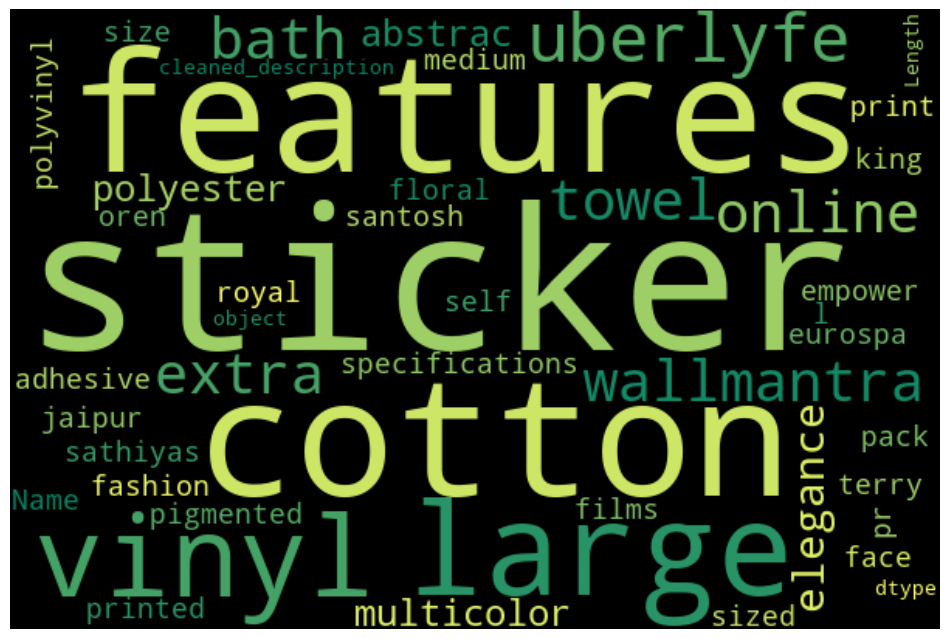

In [28]:
cloud=WordCloud(colormap="summer",width=600,height=400).generate(str(df_t["cleaned_description"]))
fig=plt.figure(figsize=(12,9))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear');

In [29]:
stop=stopwords.words('english')
stop.append("also")
df_t["stop_removed_description"]=df_t["cleaned_description"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [30]:
df_t["tokenized"]=df_t["stop_removed_description"].apply(lambda x: nltk.word_tokenize(x))

In [31]:
df_t["tokenized"]

0       [features, elegance, polyester, multicolor, ab...
1       [specifications, sathiyas, cotton, bath, towel...
2       [features, eurospa, cotton, terry, face, towel...
3       [features, santosh, royal, fashion, cotton, pr...
4       [features, jaipur, print, cotton, floral, king...
                              ...                        
1045    [oren, empower, extra, large, self, adhesive, ...
1046    [wallmantra, large, vinyl, sticker, sticker, p...
1047    [uberlyfe, extra, large, pigmented, polyvinyl,...
1048    [wallmantra, medium, vinyl, sticker, sticker, ...
1049    [uberlyfe, large, vinyl, sticker, online, uber...
Name: tokenized, Length: 1050, dtype: object

### Lemmatization

In [32]:
from nltk.stem import WordNetLemmatizer 

In [33]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
    return lem_text
df_t["lemmatized"]=df_t["tokenized"].apply(lambda x: word_lemmatizer(x))
df_t["lemmatize_joined"]=df_t["lemmatized"].apply(lambda x: ' '.join(x))

In [34]:
df_t["lemmatize_joined"].head()

0    feature elegance polyester multicolor abstract...
1    specifications sathiyas cotton bath towel bath...
2    feature eurospa cotton terry face towel size s...
3    feature santosh royal fashion cotton print kin...
4    feature jaipur print cotton floral king size d...
Name: lemmatize_joined, dtype: object

In [35]:
df_t['Nombre de mots après nettoyage'] = df_t['lemmatize_joined'].apply(lambda x:len(str(x).split()))

In [36]:
df_t

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,brand,product_specifications,category,_lon_desc,cleaned_description,stop_removed_description,tokenized,lemmatized,lemmatize_joined,Nombre de mots après nettoyage
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,1420,features elegance polyester multicolor abstrac...,features elegance polyester multicolor abstrac...,"[features, elegance, polyester, multicolor, ab...","[feature, elegance, polyester, multicolor, abs...",feature elegance polyester multicolor abstract...,141
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,444,specifications sathiyas cotton bath towel bath...,specifications sathiyas cotton bath towel bath...,"[specifications, sathiyas, cotton, bath, towel...","[specifications, sathiyas, cotton, bath, towel...",specifications sathiyas cotton bath towel bath...,55
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,1258,features eurospa cotton terry face towel size ...,features eurospa cotton terry face towel size ...,"[features, eurospa, cotton, terry, face, towel...","[feature, eurospa, cotton, terry, face, towel,...",feature eurospa cotton terry face towel size s...,131
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,...,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,858,features santosh royal fashion cotton printed ...,features santosh royal fashion cotton printed ...,"[features, santosh, royal, fashion, cotton, pr...","[feature, santosh, royal, fashion, cotton, pri...",feature santosh royal fashion cotton print kin...,102
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,...,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,1197,features jaipur print cotton floral king sized...,features jaipur print cotton floral king sized...,"[features, jaipur, print, cotton, floral, king...","[feature, jaipur, print, cotton, floral, king,...",feature jaipur print cotton floral king size d...,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,...,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,2432,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive s

In [37]:
df_t.to_csv('df_t.csv', index=False)

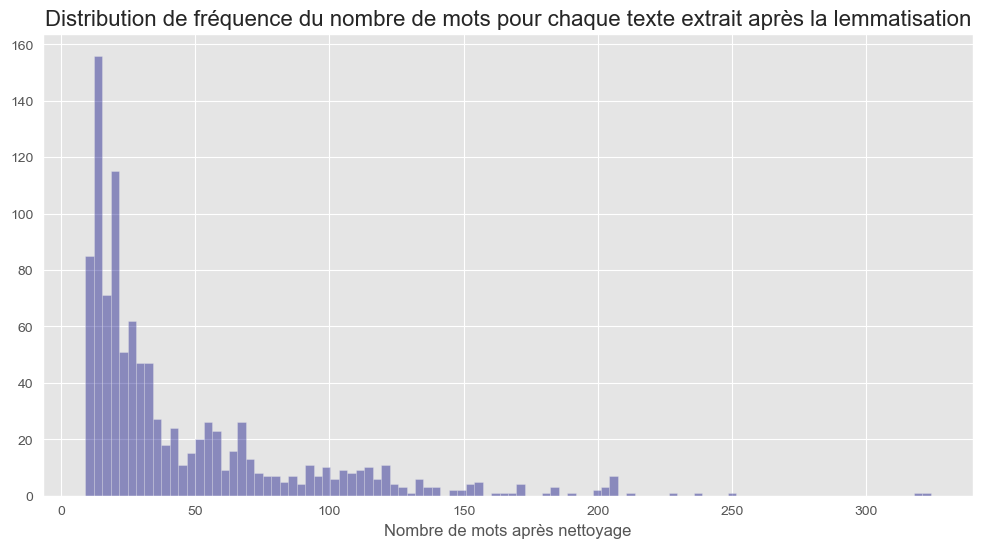

In [38]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(df_t['Nombre de mots après nettoyage'],kde = False, color= "navy", bins = 100)
plt.title("Distribution de fréquence du nombre de mots pour chaque texte extrait après la lemmatisation", size=16);

In [39]:
df_t.drop(df_t[df_t["Nombre de mots après nettoyage"]>300].index, inplace = True)

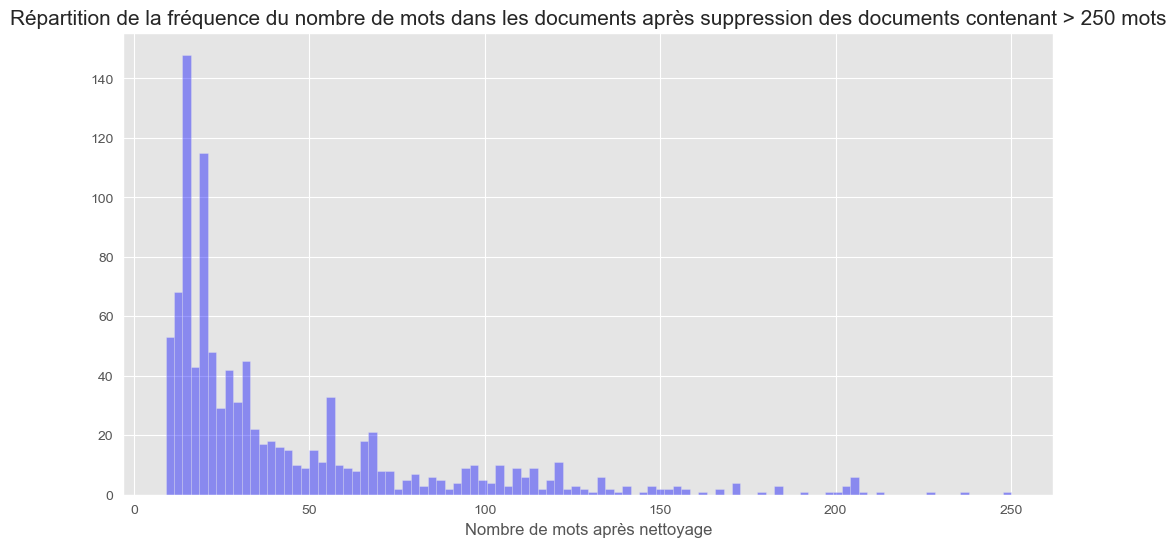

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(df_t['Nombre de mots après nettoyage'],kde = False, color= "blue", bins = 100)
plt.title("Répartition de la fréquence du nombre de mots dans les documents après suppression des documents contenant > 250 mots", size=15);

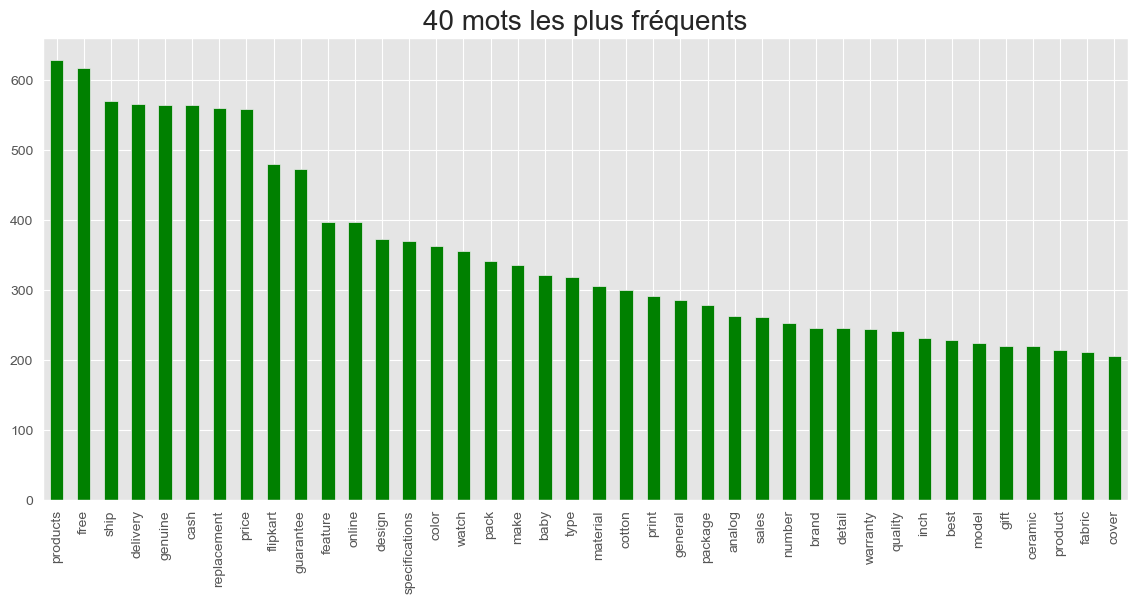

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df_t["lemmatize_joined"]).split()).value_counts()[:40]
freq.plot(kind="bar", color = "green")
plt.title("40 mots les plus fréquents",size=20);

## NLP   
### TF-IDF (Term frequency-inverse document frequency)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel
from gensim.models import Word2Vec
import itertools
import tensorflow as tf


In [43]:
from string import punctuation
from nltk.corpus import stopwords
stopwords_en = set(["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"])
stopwords_nltk = set(stopwords.words('english'))
stopwords_punct = set(punctuation)
stopwords_combined = set.union(stopwords_en, stopwords_nltk, stopwords_punct)

In [44]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer:
     def __init__(self):
         self.wnl = WordNetLemmatizer()
        
     def __call__(self, doc):
         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

tfidf = TfidfVectorizer(encoding='utf-8',
                       lowercase=True,
                       tokenizer=LemmaTokenizer(),
                       stop_words=stopwords_combined,
                       )

In [46]:
tfidf = TfidfVectorizer()
 
# get tf-df values
result = tfidf.fit_transform(df_t["lemmatize_joined"])

In [47]:
# display tf-idf values
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 2166)	0.027397267146430156
  (0, 398)	0.03865767113749738
  (0, 2502)	0.053225835094828956
  (0, 3066)	0.05332048398105012
  (0, 786)	0.030801184738734194
  (0, 2407)	0.026755542634160086
  (0, 2006)	0.038360859593822946
  (0, 1009)	0.03073075940256852
  (0, 701)	0.026061228758610274
  (0, 1099)	0.07544008473301013
  (0, 2338)	0.03490757378424297
  (0, 2253)	0.06146151880513704
  (0, 3716)	0.025883656959427393
  (0, 435)	0.02694880769348391
  (0, 1499)	0.0239970943529323
  (0, 3343)	0.022401068740301032
  (0, 3467)	0.07544008473301013
  (0, 114)	0.06823988163978455
  (0, 2986)	0.0545098820748413
  (0, 2021)	0.040109475888390124
  (0, 1351)	0.07122823592589668
  (0, 3298)	0.07544008473301013
  (0, 457)	0.04406482531046763
  (0, 2742)	0.03362594985975211
  (0, 3313)	0.06823988163978455
  :	:
  (1046, 949)	0.058886445972381594
  (1046, 554)	0.05895084409734762
  (1046, 3181)	0.058886445972381594
  (1046, 1434)	0.05706677930788321
  (1046, 1592)	0.06550034644260636
  (

In [48]:
# Converting each sequence of words into a single string
corpus = df_t['lemmatize_joined']

# Defining the vectorizer
vectorizer = TfidfVectorizer()

# Fitting it to the string 
vectorizer.fit(corpus)

# Transforming the corpus into a TF-IDF matrix
tfidf_matrix = vectorizer.transform(corpus)

# Converting the TF-IDF matrix to a df
feature_names = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

In [49]:
df_tfidf

,aapno,aari,aarika,abide,abilities,ability,abkl,able,abroad,absolute,...,zero,zikrak,zinc,zingalalaa,zipexterior,zipper,zone,zoom,zora,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Dimensional reduction
from sklearn.decomposition import PCA

In [51]:
# Defining the PCA
n_components = 2
pca = PCA(n_components=n_components)

# Fitting to the df_tfidf
pca_result = pca.fit_transform(df_tfidf)

# New df for the results 
df_pca = pd.DataFrame(data=pca_result, columns=["PC{}".format(i+1) for i in range(n_components)])

In [52]:
df_pca

,PC1,PC2
0,-0.201817,-0.012999
1,-0.188942,-0.006644
2,-0.189502,-0.009583
3,-0.217456,0.002014
4,-0.230630,-0.007387
...,...,...
1043,-0.138621,0.002570
1044,-0.174679,-0.000899
1045,-0.018493,-0.042746
1046,0.007900,-0.063302


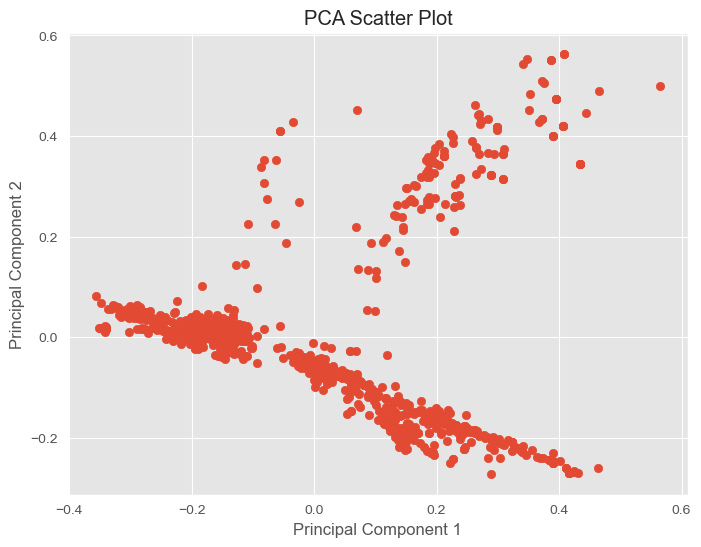

In [53]:
# Plot 
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

### t-SNE visualization for TF-IDF

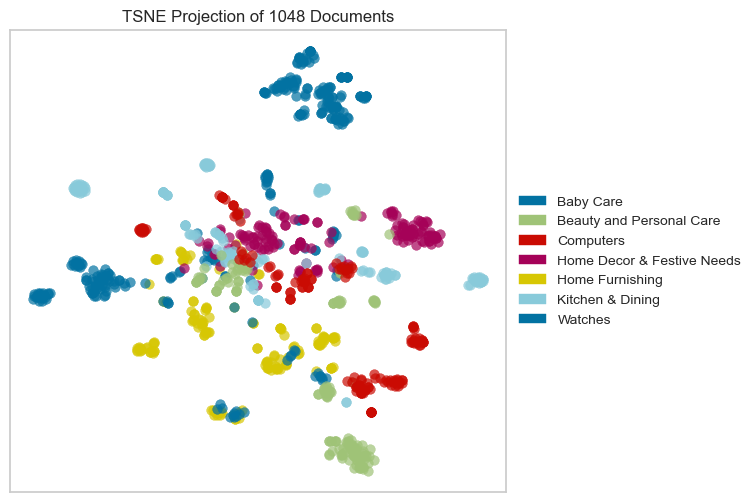

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer


# Load the data and create document vectors
corpus = df_t.lemmatize_joined
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus)
y = df_t.category

# Create the visualizer and draw the vectors
plt.figure(figsize=(8, 6))
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show();

### Kmeans clustering et représentation visuelle du t-SNE avec TF-ID

In [55]:
from sklearn.cluster import KMeans

In [56]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_t.lemmatize_joined)

In [57]:
num_clusters = 7  # Set the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Assign cluster labels to incidents
cluster_labels = kmeans.labels_


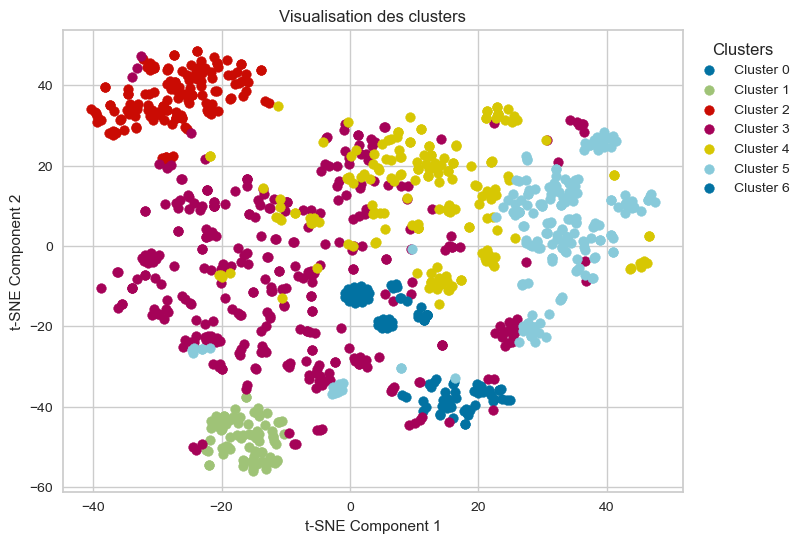

In [58]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Visualize clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_tsne[cluster_labels == i, 0],
        X_tsne[cluster_labels == i, 1],
        label=f"Cluster {i}",
    )
plt.title("Visualisation des clusters")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Clusters')
plt.show()

#### ARI score of categories vs USE clusters 

In [59]:
ari = adjusted_rand_score(df['category'], cluster_labels)

print("Adjusted Rand Score:", ari)

Adjusted Rand Score: 0.25696548103178274


In [60]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings 
warnings.filterwarnings(action='ignore')

In [61]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'category' column
df_t['category_encoded'] = label_encoder.fit_transform(df_t['category'])


In [62]:
model1 = gensim.models.Word2Vec(df_t.lemmatize_joined, min_count=1,
                                vector_size=100, window=5)

In [63]:
# Creating a list of sentences from df_image['lemmatized']
sentences = df_t.lemmatize_joined.tolist()

# Training the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Empty list to store sentence vectors
sentence_vectors = []

# Iterating through each sentence
for sentence in sentences:
    sentence_vector = []
    # Iterating through each word in the sentence and getting its vector
    for word in sentence:
        if word in model.wv:
            sentence_vector.append(model.wv[word])
    # Calculating the mean vector of the sentence
    if sentence_vector:
        mean_vector = np.mean(sentence_vector, axis=0)
        sentence_vectors.append(mean_vector)

# Creating a DataFrame from the sentence vectors
df_sentence_vectors = pd.DataFrame(sentence_vectors, index=df_t['lemmatize_joined'], columns=[f'feature_{i+1}' for i in range(100)])


In [64]:
len(df_sentence_vectors)

1048

In [ ]:
# Defining the t-SNE 
n_components = 2
tsne = TSNE(n_components = n_components)

# Fitting to the word_vectors_df
tsne_result_wv = tsne.fit_transform(df_sentence_vectors)

# Create a new DataFrame for the t-SNE results
df_tsne_wv = pd.DataFrame(data = tsne_result_wv, columns = ["TSNE{}".format(i+1) for i in range(n_components)])

In [ ]:
df_tsne_wv

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne_wv['TSNE1'], df_tsne_wv['TSNE2'], c=df_t['category_encoded'], cmap='rainbow')

# Adding a legend based on the 'category' column
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, df_t['category'].unique(), title='Categories', bbox_to_anchor=(1,1), loc='upper left')
legend.get_title().set_fontweight('bold')

# Adding details 
plt.xlabel('t-SNE Component 1', fontweight = 'bold')
plt.ylabel('t-SNE Component 2', fontweight = 'bold')
plt.title('t-SNE Scatter Plot of real categories', fontweight ='bold', fontsize=18)
plt.show()

#### Kmeans clustering and visual representation of the t-SNE on Word2Vec 

In [ ]:
import random

In [ ]:
# kMeans on the t-SNE components
n_clusters = 7  
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df_tsne_wv[['TSNE1', 'TSNE2']])

# Retrieve cluster labels 
cluster_labels_wv = kmeans.labels_

# Converting to df
df_tsne_wv['Cluster'] = cluster_labels_wv

In [ ]:
# Plot with a different color for each cluster 
#colors = random_colors(7) # Randomly selects 7 colors for the graph 

plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(cluster_labels_wv)):
    cluster_indices = np.where(cluster_labels_wv == label)
    sns.scatterplot(data=df_tsne_wv.loc[cluster_indices], x='TSNE1', y='TSNE2', label=f'Cluster {label}')

# Adding details 
plt.xlabel('t-SNE Component 1', fontweight ='bold')
plt.ylabel('t-SNE Component 2', fontweight ='bold')
plt.title('t-SNE scatter plot of clusters', fontweight ='bold', fontsize=18)

# Moving the legend outside of the graph
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Clusters')
legend = plt.gca().get_legend()
legend.get_title().set_fontweight('bold')

plt.show()

In [ ]:
ari = adjusted_rand_score(df_t['category'], cluster_labels_wv)

print("Adjusted Rand Score:", ari)

### BERT 

In [101]:
import torch

In [102]:
# Setting the device to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loading the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Setting the model to evaluation mode
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [103]:
# Function to encode the text using the tokenizer
def get_bert_embeddings(text):
    encoded_input = tokenizer(text, padding = True, truncation = True, return_tensors = 'pt')
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask = attention_mask)
        
    # Calculating the mean embedding of the last hidden state
    embeddings = outputs.last_hidden_state.mean(dim = 1)
    
    # Converting the embeddings to a list and return
    return embeddings.tolist()[0]

In [104]:
# Applying the function to the lemmatized text
df_bert = df_t['lemmatize_joined'].apply(get_bert_embeddings)

In [105]:
# Transforming to df
df_bert_fin = pd.DataFrame(df_bert)

In [106]:
df_bert_fin

,lemmatize_joined
0,"[0.04804511368274689, 0.046610839664936066, 0...."
1,"[0.18314212560653687, -0.02782324329018593, 0...."
2,"[0.007824835367500782, 0.0022673725616186857, ..."
3,"[0.18816757202148438, -0.03589947521686554, 0...."
4,"[0.25443196296691895, 0.02988302707672119, 0.6..."
...,...
1045,"[-0.12494365870952606, 0.2245059758424759, 0.5..."
1046,"[-0.3881279528141022, 0.0947309136390686, 0.59..."
1047,"[0.19897940754890442, -0.1123645231127739, 0.4..."
1048,"[0.05565405637025833, -0.03943667933344841, 0...."


In [108]:
# Transforming to a list
df_bert_list = pd.DataFrame(df_bert_fin['lemmatize_joined'].to_list())

# Splitting the values within the columns using comma delimiter
df_bert_conc = pd.concat([df_bert_list[col].astype(str).str.split(',', expand=True) for col in df_bert_list.columns], axis=1)

# Renaming columns starting from 0
df_bert_conc.columns = [str(i) for i in range(len(df_bert_conc.columns))]

# Displaying the resulting DataFrame with separate columns
df_bert_conc

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.04804511368274689,0.046610839664936066,0.7873408198356628,-0.12329040467739105,0.4309496283531189,0.007683826144784689,0.09294295310974121,0.0586133636534214,-0.019880129024386406,-0.3061487674713135,...,-0.02509152516722679,-0.4458596706390381,0.09960231184959412,0.12727144360542297,0.11184434592723846,0.08268458396196365,-0.36888936161994934,0.022447124123573303,-0.07715581357479095,-0.13652800023555756
1,0.18314212560653687,-0.02782324329018593,0.5348010063171387,0.12005120515823364,0.19718357920646667,0.005752130411565304,0.1744929552078247,-0.0077481321059167385,-0.1438332498073578,-0.16580861806869507,...,-0.037798408418893814,-0.1241784542798996,0.09746749699115753,-0.02511741779744625,0.15218763053417206,0.09989475458860397,-0.37452033162117004,-0.1360265165567398,-0.18188416957855225,0.15960907936096191
2,0.007824835367500782,0.0022673725616186857,0.5762696266174316,-0.03653585910797119,0.31263652443885803,-0.00377508532255888,-0.10784756392240524,0.1831032633781433,-0.13834963738918304,-0.27761560678482056,...,-0.13666260242462158,-0.23302115499973297,0.14451773464679718,0.044191040098667145,0.16111531853675842,0.0901680737733841,-0.46205276250839233,-0.09621627628803253,-0.2085743099451065,0.03215252235531807
3,0.18816757202148438,-0.03589947521686554,0.7175165414810181,0.03351376950740814,0.3220038115978241,-0.23248618841171265,-0.08416551351547241,0.20604532957077026,-0.05749811232089996,-0.0063233403488993645,...,0.10812373459339142,-0.14715039730072021,0.13632744550704956,-0.09044045209884644,0.10717826336622238,0.17352595925331116,-0.4426063895225525,-0.02190212905406952,0.012332340702414513,-0.13386133313179016
4,0.25443196296691895,0.02988302707672119,0.6154786348342896,-0.08420141041278839,0.3025406301021576,-0.18655537068843842,-0.017988743260502815,0.2989371120929718,0.06491528451442719,-0.11216564476490021,...,0.07192430645227432,-0.24966850876808167,0.19995726644992828,0.020121267065405846,-0.001570894499309361,0.12087883055210114,-0.5629705190658569,0.02269718050956726,-0.002450201427564025,-0.13916899263858795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,-0.12494365870952606,0.2245059758424759,0.5290270447731018,-0.24495460093021393,0.5421457290649414,-0.25958842039108276,0.07284571975469589,0.1775914877653122,0.11515384167432785,-0.20280544459819794,...,-0.35391008853912354,-0.39847052097320557,0.029629714787006378,0.25875604152679443,0.17134885489940643,-0.0071940189227461815,-0.5263594388961792,0.025801552459597588,-0.12162918597459793,0.05164889991283417
1044,-0.3881279528141022,0.0947309136390686,0.5905271768569946,-0.09127460420131683,0.43021684885025024,-0.2671785354614258,0.07687202841043472,0.23494316637516022,0.2785288393497467,-0.13544827699661255,...,-0.19953598082065582,-0.3414401113986969,0.045543357729911804,0.23730921745300293,-0.005389007274061441,-0.10120850056409836,-0.3924274444580078,0.013136238791048527,-0.11378566920757294,-0.19826146960258484
1045,0.19897940754890442,-0.1123645231127739,0.43280264735221863,0.08352876454591751,0.35356226563453674,-0.21194355189800262,-0.1824338734149933,0.5244327187538147,-0.18345008790493011,-0.042359355837106705,...,0.0016245096921920776,-0.4650023877620697,0.13862130045890808,0.006051506847143173,0.1336928904056549,-0.012780305929481983,-0.4313761293888092,0.05769456923007965,-0.045955248177051544,-0.1787092685699463
1046,0.05565405637025833,-0.03943667933344841,0.44159039855003357,0.12322184443473816,0.26278361678123474,-0.27610570192337036,-0.008135638199746609,0.28833839297294617,0.08566761016845703,-0.1690397560596466,...,0.0157596617937088,-0.5979921221733093,0.2989043593406677,-0.11364637315273285,0.15752452611923218,-0.23682673275470734,-0.5113663673400879,0.2509691119194031,-0.03593527525663376,-0.42000511288642883


#### T-SNE on BERT 

In [109]:
# Defining the t-SNE 
n_components = 2
tsne = TSNE(n_components = n_components)

# Fitting to the df_tfidf
tsne_result_bert = tsne.fit_transform(df_bert_conc)

# Creating a new df for the results
df_tsne_bert = pd.DataFrame(data = tsne_result_bert, columns = ["TSNE{}".format(i+1) for i in range(n_components)])

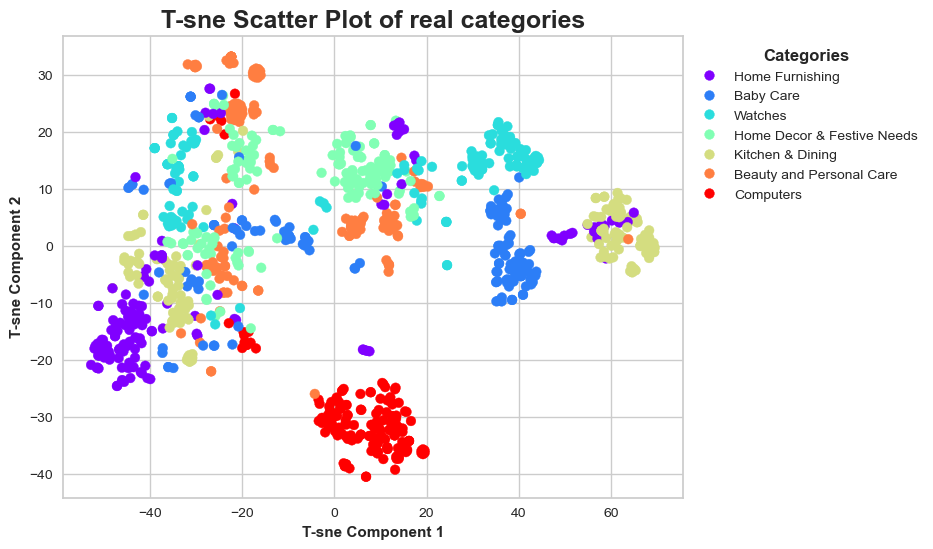

In [132]:
# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_tsne_bert['TSNE1'], df_tsne_bert['TSNE2'], c=df_t['category_encoded'], cmap='rainbow')

# Adding a legend based on the 'category' column
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, df_t['category'].unique(), title='Categories', bbox_to_anchor=(1,1), loc='upper left')
legend.get_title().set_fontweight('bold')

# Adding details 
plt.xlabel('T-sne Component 1', fontweight = 'bold')
plt.ylabel('T-sne Component 2', fontweight = 'bold')
plt.title('T-sne Scatter Plot of real categories', fontweight ='bold', fontsize=18)
plt.show()

#### Kmeans clustering and visual representation of the t-SNE on BERT

In [111]:
# kMeans on the t-SNE components
n_clusters = 7  
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df_tsne_bert[['TSNE1', 'TSNE2']])

# Retrieving cluster labels 
cluster_labels_bert = kmeans.labels_

# Converting to df
df_tsne_bert['Cluster'] = cluster_labels_bert

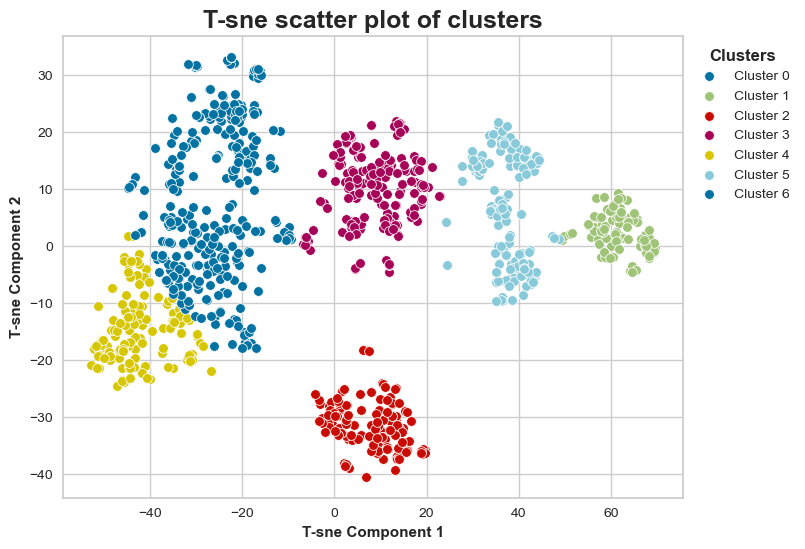

In [131]:
# Plot with a different color for each cluster 

plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(cluster_labels_bert)):
    cluster_indices = np.where(cluster_labels_bert == label)
    sns.scatterplot(data=df_tsne_bert.loc[cluster_indices], x='TSNE1', y='TSNE2', label=f'Cluster {label}')

# Adding details 
plt.xlabel('T-sne Component 1', fontweight ='bold')
plt.ylabel('T-sne Component 2', fontweight ='bold')
plt.title('T-sne scatter plot of clusters', fontweight ='bold', fontsize=18)

# Moving the legend outside of the graph
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Clusters')
legend = plt.gca().get_legend()
legend.get_title().set_fontweight('bold')

plt.show()

#### ARI scores of real categories vs BERT 

In [114]:
ari = adjusted_rand_score(df_t['category'], cluster_labels_bert)

print("Adjusted Rand Score:", ari)

Adjusted Rand Score: 0.31779734281214445


### USE (Universal Sentence Encoder)

In [119]:
#Converting each sequence of words into a single string
sentences = df_t['lemmatize_joined'].apply(' '.join).values.astype('U')

# Getting and loading the URL for the USE model
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
use_model = hub.load(module_url)

# Creating a KerasLayer fro mthe loaded model
embedding_fn = hub.KerasLayer(use_model, input_shape=[], dtype=tf.string, trainable=False)

# Creating a sequential model with the embedding layer
embedding_model = tf.keras.Sequential([embedding_fn])

# Converting the sentences to a numpy array
sentences_array = np.array(sentences, dtype=object) 

# Generating the sentences with the embedding model
embeddings = embedding_model.predict(sentences_array)

# Transforming to df
embedding_df = pd.DataFrame(embeddings)

33/33 [==============================] - 1471s 45s/step


In [120]:
embedding_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.033529,0.005593,-0.033619,-0.019755,0.031313,0.052536,-0.018704,-0.045935,0.049436,0.006521,...,-0.004326,0.051562,0.043402,0.026941,-0.026880,-0.121074,0.035770,0.030475,0.007476,0.024988
1,-0.032931,-0.014672,-0.022670,0.030195,0.019436,0.043736,-0.004194,-0.075259,0.032070,0.010786,...,-0.012312,0.008845,0.030894,-0.015897,-0.045434,-0.107823,0.021592,0.024653,0.018462,0.021780
2,-0.038978,-0.002425,-0.021920,-0.014565,0.032739,0.053969,-0.021076,-0.048443,0.039901,0.009252,...,0.000215,0.041267,0.047461,0.023206,-0.029807,-0.113523,0.036356,0.034544,0.004563,0.015400
3,-0.032347,-0.016947,-0.025589,-0.010472,0.037240,0.067427,-0.020840,-0.054699,0.034560,0.015550,...,0.000262,0.026612,0.044138,0.010537,-0.039083,-0.118177,0.039734,0.032643,-0.001159,0.022624
4,-0.027723,-0.001744,-0.026327,-0.016045,0.038618,0.072632,-0.014721,-0.045618,0.042509,0.016353,...,-0.000673,0.040620,0.049864,0.019722,-0.031806,-0.114381,0.038945,0.036833,-0.001436,0.024166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,-0.032282,0.006135,-0.029129,-0.020111,0.016617,0.051452,-0.035046,-0.048416,0.041442,0.010120,...,-0.011877,0.062242,0.045373,0.023506,-0.029913,-0.113927,0.036121,0.032095,0.001256,0.032049
1044,-0.036440,0.002581,-0.026254,-0.027388,0.025824,0.045920,-0.018971,-0.043861,0.036792,0.005104,...,-0.006930,0.047469,0.045476,0.026839,-0.027651,-0.125578,0.035495,0.033867,0.012300,0.014856
1045,-0.038190,0.007773,-0.019618,0.034748,-0.003226,0.021599,-0.014132,-0.063171,0.017169,0.001429,...,-0.022366,-0.009080,0.023328,-0.009145,-0.065563,-0.089140,0.009566,0.000837,0.022488,0.011840
1046,-0.024200,0.000890,-0.022662,0.031434,-0.007697,0.011863,-0.000972,-0.059537,0.012374,-0.009132,...,-0.036260,-0.010704,0.028996,-0.013810,-0.061179,-0.102083,0.016745,0.018931,0.031388,0.003283


#### t-SNE on USE 

In [121]:
# Defining the t-SNE 
n_components = 2
tsne = TSNE(n_components = n_components)

# Fitting to the df_tfidf
tsne_result_use = tsne.fit_transform(embedding_df)

# Create a new DataFrame for the t-SNE results
df_tsne_use = pd.DataFrame(data = tsne_result_use, columns = ["TSNE{}".format(i+1) for i in range(n_components)])

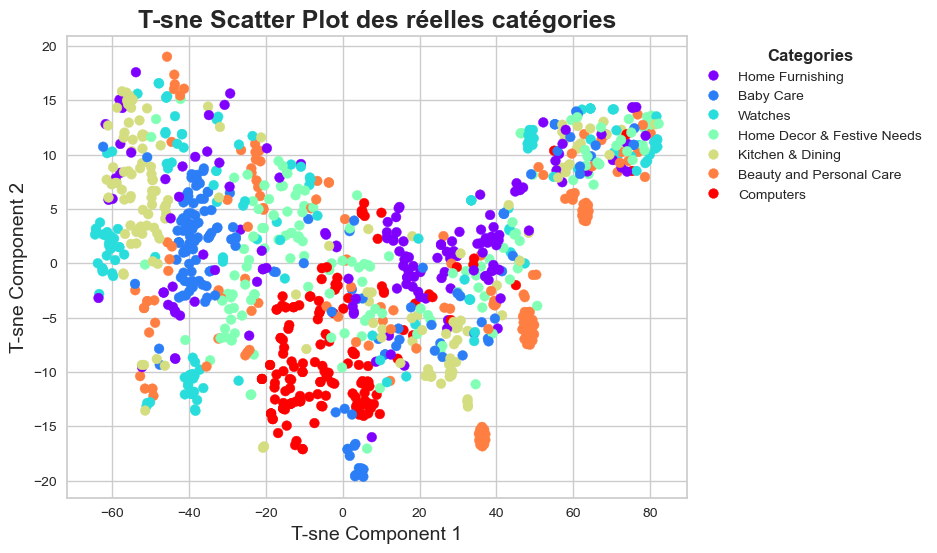

In [129]:
# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_tsne_use['TSNE1'], df_tsne_use['TSNE2'], c=df_t['category_encoded'], cmap='rainbow')

# Adding a legend based on the 'category' column
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, df_t['category'].unique(), title='Categories', bbox_to_anchor=(1,1), loc='upper left')
legend.get_title().set_fontweight('bold')

# Adding details 
plt.xlabel('T-sne Component 1', fontsize=14)
plt.ylabel('T-sne Component 2', fontsize=14)
plt.title('T-sne Scatter Plot des réelles catégories', fontweight ='bold', fontsize=18)
plt.show()

#### Kmeans clustering and visual representation of the t-SNE on USE

In [123]:
# kMeans on the t-SNE components
n_clusters = 7  
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df_tsne_use[['TSNE1', 'TSNE2']])

# Retrieve cluster labels 
cluster_labels_use = kmeans.labels_

# Converting to df
df_tsne_use['Cluster'] = cluster_labels_use

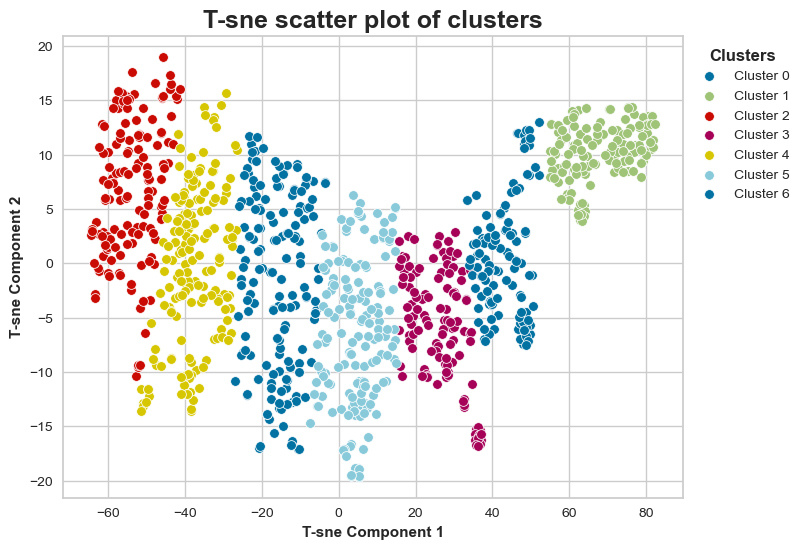

In [130]:
# Plot with a different color for each cluster 


plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(cluster_labels_use)):
    cluster_indices = np.where(cluster_labels_use == label)
    sns.scatterplot(data=df_tsne_use.loc[cluster_indices], x='TSNE1', y='TSNE2', label=f'Cluster {label}')

# Adding details 
plt.xlabel('T-sne Component 1', fontweight ='bold')
plt.ylabel('T-sne Component 2', fontweight ='bold')
plt.title('T-sne scatter plot of clusters', fontweight ='bold', fontsize=18)

# Moving the legend outside of the graph
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Clusters')
legend = plt.gca().get_legend()
legend.get_title().set_fontweight('bold')

plt.show()

#### ARI score of categories vs USE clusters 

In [126]:
ari = adjusted_rand_score(df_t['category'], cluster_labels_use)

print("Adjusted Rand Score:", ari)

Adjusted Rand Score: 0.12229353061333906
